In [5]:
import numpy as np

#BeH_p_ryrz
data = np.loadtxt('BeH_p_ryrz_PES_data.txt', skiprows=1)
BeH_p_ryrz_bondlengths = data[:, 0].tolist()
BeH_p_ryrz_fcis = [data[:, 1].tolist(), data[:, 4].tolist()]
BeH_p_ryrz_energies = [data[:, 2].tolist(), data[:, 5].tolist()]
BeH_p_ryrz_errors = [data[:, 3].tolist(), data[:, 6].tolist()]

# HCl_ryrz
data = np.loadtxt('HCl_ryrz_PES_data.txt', skiprows=1)
HCl_ryrz_bondlengths = data[:, 0].tolist()
HCl_ryrz_fcis = [data[:, 1].tolist(), data[:, 4].tolist()]
HCl_ryrz_energies = [data[:, 2].tolist(), data[:, 5].tolist()]
HCl_ryrz_errors = [data[:, 3].tolist(), data[:, 6].tolist()]

# BeH_p_Nblock
data = np.loadtxt('BeH_p_Nblock_PES_data.txt', skiprows=1)
BeH_p_Nblock_bondlengths = data[:, 0].tolist()
BeH_p_Nblock_fcis = [data[:, 1].tolist(), data[:, 4].tolist()]
BeH_p_Nblock_energies = [data[:, 2].tolist(), data[:, 5].tolist()]
BeH_p_Nblock_errors = [data[:, 3].tolist(), data[:, 6].tolist()]

# HCl_Nblock
data = np.loadtxt('HCl_Nblock_PES_data.txt', skiprows=1)
HCl_Nblock_bondlengths = data[:, 0].tolist()
HCl_Nblock_fcis = [data[:, 1].tolist(), data[:, 4].tolist()]
HCl_Nblock_energies = [data[:, 2].tolist(), data[:, 5].tolist()]
HCl_Nblock_errors = [data[:, 3].tolist(), data[:, 6].tolist()]

In [6]:
repeat_ryrz = []
ryrz_depth = []
ryrz_params = []
repeat_Nblock = []
Nblock_depth = []
Nblock_params = []

with open('depth_params_data.txt', 'r') as f:
    for line in f:
        key, *values = line.strip().split('\t')
        values = list(map(float, values))
        if key == 'repeat_ryrz':
            repeat_ryrz = [int(v) for v in values]
        elif key == 'ryrz_depth':
            ryrz_depth = values
        elif key == 'ryrz_params':
            ryrz_params = values
        elif key == 'repeat_Nblock':
            repeat_Nblock = [int(v) for v in values]
        elif key == 'Nblock_depth':
            Nblock_depth = values
        elif key == 'Nblock_params':
            Nblock_params = values

In [7]:
species = []
average_iteration = []
deviation = []

with open('iteration_data.txt', 'r') as f:
    for idx, line in enumerate(f):
        key, *values = line.strip().split('\t')
        if idx == 0:

            continue
        values = list(map(float, values))
        if key == 'average_iteration':
            average_iteration = values
        elif key == 'deviation':
            deviation = values

Text(-0.08, 1.0, '(c)')

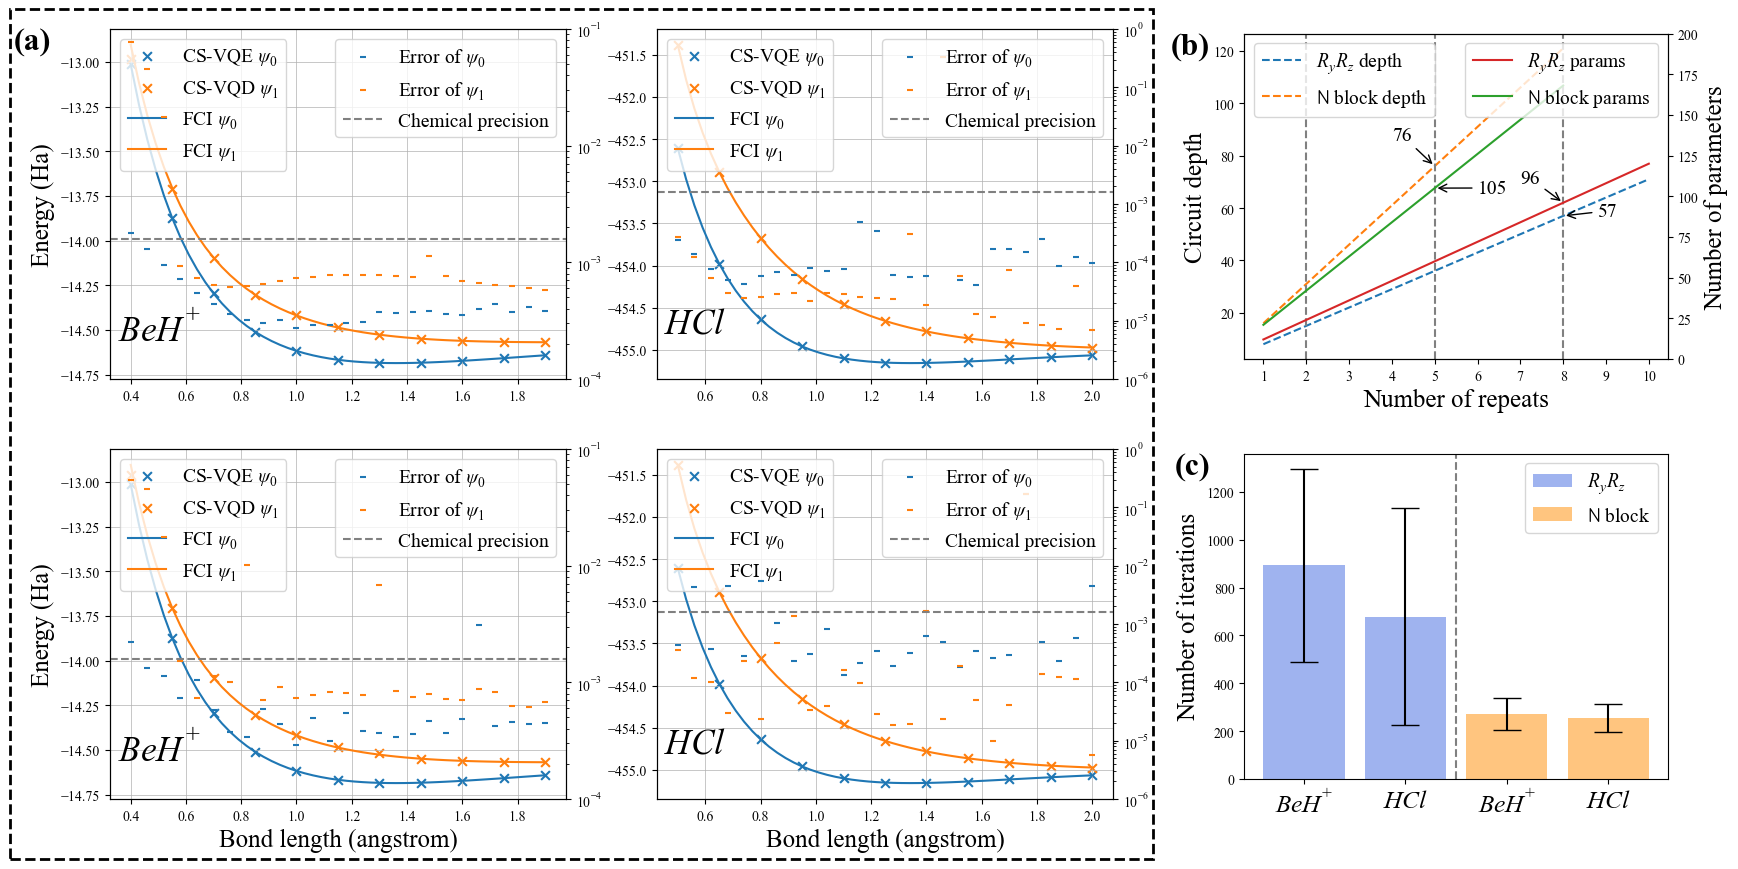

In [8]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.patches as patches

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Times New Roman'
rcParams['mathtext.it'] = 'Times New Roman:italic'
rcParams['mathtext.bf'] = 'Times New Roman:bold'
label_fontsize = 18
legend_fontsize = 14

energy_step=5
error_step=2
def plot_data(ax, bondlengths, energies, fcis, errors, ax_twin_ylim):
    ax.scatter(bondlengths[::energy_step], energies[0][::energy_step], label=r'CS-VQE $\psi_0$', marker='x', s=40)
    ax.scatter(bondlengths[::energy_step], energies[1][::energy_step], label=r'CS-VQD $\psi_1$', marker='x', s=40)
    ax.plot(bondlengths, fcis[0], label=r'FCI $\psi_0$')
    ax.plot(bondlengths, fcis[1], label=r'FCI $\psi_1$')
    ax_twin = ax.twinx()
    ax_twin.scatter(bondlengths[::error_step], errors[0][::error_step], label=r'Error of $\psi_0$', marker='_', s=15)
    ax_twin.scatter(bondlengths[::error_step], errors[1][::error_step], label=r'Error of $\psi_1$', marker='_', s=15)
    ax_twin.set_ylim(ax_twin_ylim[0], ax_twin_ylim[1])
    ax_twin.set_yscale('log')
    ax_twin.axhline(y=0.0016, color='grey', linestyle='--', label='Chemical precision')
    ax.legend(loc='upper left', fontsize=legend_fontsize)
    ax.grid(which='both', axis='both', linestyle='-', linewidth=0.5)
    ax_twin.legend(loc='upper right', fontsize=legend_fontsize)
    

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

text_height = 0.2
# BeH+ ryrz
plot_data(axs[0,0], BeH_p_ryrz_bondlengths, BeH_p_ryrz_energies, BeH_p_ryrz_fcis, BeH_p_ryrz_errors, [1e-4, 1e-1])
axs[0,0].text(0.2, text_height, r'$BeH^+$', transform=axs[0,0].transAxes, ha='right', va='top', fontsize=25)

# HCl ryrz
plot_data(axs[0,1], HCl_ryrz_bondlengths, HCl_ryrz_energies, HCl_ryrz_fcis, HCl_ryrz_errors, [1e-6, 1e0])
axs[0,1].text(0.15, text_height, r'$HCl$', transform=axs[0,1].transAxes, ha='right', va='top', fontsize=25)

# BeH+ Nblock
plot_data(axs[1,0], BeH_p_Nblock_bondlengths, BeH_p_Nblock_energies, BeH_p_Nblock_fcis, BeH_p_Nblock_errors, [1e-4, 1e-1])
axs[1,0].text(0.2, text_height, r'$BeH^+$', transform=axs[1,0].transAxes, ha='right', va='top', fontsize=25)

# HCl Nblock
plot_data(axs[1,1], HCl_Nblock_bondlengths, HCl_Nblock_energies, HCl_Nblock_fcis, HCl_Nblock_errors, [1e-6, 1e0])
axs[1,1].text(0.15, text_height, r'$HCl$', transform=axs[1,1].transAxes, ha='right', va='top', fontsize=25)

axs[1,0].set_xlabel('Bond length (angstrom)', fontsize=label_fontsize)
axs[1,1].set_xlabel('Bond length (angstrom)', fontsize=label_fontsize)
axs[0,0].set_ylabel('Energy (Ha)', fontsize=label_fontsize)
axs[1,0].set_ylabel('Energy (Ha)', fontsize=label_fontsize)

########################################
#depth
axs[0,2].plot(repeat_ryrz, ryrz_depth, color='tab:blue', label=r'$R_{y}R_{z}$ depth',linestyle='--')
axs[0,2].plot(repeat_Nblock, Nblock_depth, color='tab:orange', label=r'$\mathcal{N}$ block depth',linestyle='--')
axs[0,2].tick_params(axis='y')
axs[0,2].legend(loc='upper left', fontsize=legend_fontsize)
axs[0,2].set_xticks(repeat_ryrz)


ax2 = axs[0,2].twinx()

ax2.plot(repeat_ryrz, ryrz_params, color='tab:red',label=r'$R_{y}R_{z}$ params')
ax2.plot(repeat_Nblock, Nblock_params, color='tab:green',label=r'$\mathcal{N}$ block params')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right', fontsize=legend_fontsize)
ax2.set_ylim(0,200)

axs[0,2].axvline(x=2, color='gray', linestyle='--')
axs[0,2].axvline(x=5, color='gray', linestyle='--')
axs[0,2].axvline(x=8, color='gray', linestyle='--')
repeat_note = 5
axs[0,2].annotate('76',
             xy=(repeat_note, Nblock_depth[repeat_note-1]), xycoords='data',
             xytext=(4, Nblock_depth[5]-5 ), textcoords='data',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=legend_fontsize)
ax2.annotate('105',
             xy=(repeat_note, Nblock_params[repeat_note-1]), xycoords='data',
             xytext=(6, Nblock_params[4]-3 ), textcoords='data',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=legend_fontsize)
axs[0,2].annotate('57',
             xy=(8, ryrz_depth[7]), xycoords='data',
             xytext=(8.8, ryrz_depth[7] ), textcoords='data',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=legend_fontsize)
ax2.annotate('96',
             xy=(8, ryrz_params[7]), xycoords='data',
             xytext=(7, ryrz_params[8] ), textcoords='data',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=legend_fontsize)

axs[0,2].set_xlabel('Number of repeats', fontsize=label_fontsize)
axs[0,2].set_ylabel('Circuit depth', fontsize=label_fontsize)
ax2.set_ylabel('Number of parameters', fontsize=label_fontsize)

########################################
#iteration
species=[1,2,3,4]

colors = ['royalblue', 'royalblue', 'darkorange', 'darkorange']
bars = axs[1,2].bar(species, average_iteration, yerr=deviation, align='center', alpha=0.5, 
        ecolor='black', capsize=10, color=colors)
axs[1,2].axvline(x=2.5, color='gray', linestyle='--')

bars[0].set_label(r'$R_{y}R_{z}$')
bars[2].set_label(r'$\mathcal{N}$ block')

axs[1,2].legend(loc='upper right', fontsize=legend_fontsize)
axs[1,2].set_xticks(species)
axs[1,2].set_xticklabels([r'$BeH^{+}$', r'$HCl$', r'$BeH^{+}$', r'$HCl$'], fontsize=label_fontsize)
axs[1,2].set_ylabel('Number of iterations', fontsize=label_fontsize)



bbox = axs[0,2].get_position()
axs[0,2].set_position([bbox.x0+0.02, bbox.y0+0.02, bbox.width * 0.93, bbox.height * 0.93])

bbox = axs[1,2].get_position()
axs[1,2].set_position([bbox.x0+0.02, bbox.y0+0.02, bbox.width * 0.93, bbox.height * 0.93])


pos0 = axs[0, 0].get_position()
pos1 = axs[1, 1].get_position()


x0 = pos0.x0
y0 = pos1.y0
width = pos1.x1 - pos0.x0
height = pos0.y1 - pos1.y0


rect = patches.Rectangle((x0-0.05, y0-0.06), width+0.07, height+0.08, 
                         linewidth=2, edgecolor='black', linestyle='--', facecolor='none')
fig.add_artist(rect)

axs[0,0].text(-0.13, 1., '(a)', transform=axs[0,0].transAxes, fontsize=label_fontsize+5, fontweight='bold', va='top', ha='right')
axs[0,2].text(-0.08, 1., '(b)', transform=axs[0,2].transAxes, fontsize=label_fontsize+5, fontweight='bold', va='top', ha='right')
axs[1,2].text(-0.08, 1., '(c)', transform=axs[1,2].transAxes, fontsize=label_fontsize+5, fontweight='bold', va='top', ha='right')